**Outline**

1. Topic Review
2. Case 1 - Election and The Economy
3. Case 2 - Medical Charges

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - doing simulation
  - drawing graph and other visualization

In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# modelling
import statsmodels.formula.api as smf

# statistics
import scipy.stats as stats

In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

## **Topic Review**
---
## Simple Linear Regression Model
- Simple regression built in this equation
$y=a+bx+\epsilon$
    - y : output / outcome
    - x : input variables / predictor
    - a : intercept
    - b : slope
- a,b, and standard deviation of error $\sigma$ are parameters of the model.
- We can get the estimated a and b using OLS estimate

- Simple averages and comparisons can be understood as special examples of linear regression.

## **Case 1 - Election and The Economy**
---

- Here we demonstrate the usage of simple linear regression to predict elections vote share based on economic growth (%).
### Load Data




In [3]:
hibbs = pd.read_csv("hibbs.dat", delimiter=" ")
hibbs.head()

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon


- An incumbent party is a political party that is currently holding the majority power in a government.
- In a democracy, the incumbent party is usually the party that won the most recent election and
- Currently in control of the executive branch of government (e.g. the president or prime minister).
- Let's do visualization the predictor and the outcome first

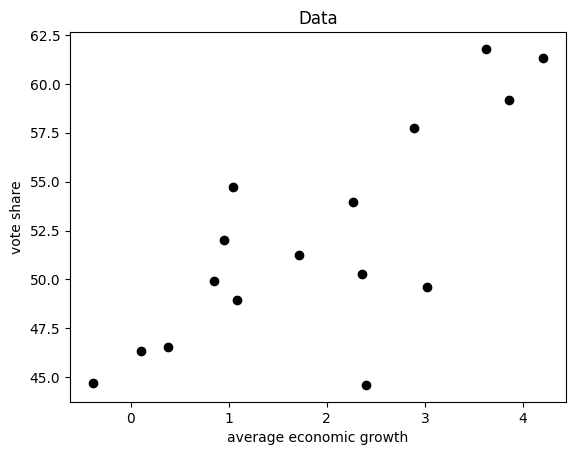

In [4]:
import matplotlib.pyplot as plt

x = hibbs["growth"]
y = hibbs["vote"]

# Plot the data
plt.scatter(x, y, color = "k")

# Add a legend and labels

plt.xlabel("average economic growth")
plt.ylabel("vote share")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

### Fit Linear Regression

In [5]:
# Create OLS model object
model = smf.ols("vote ~ growth", hibbs)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_economy_election = print_coef_std_err(results)

- Visualize the data and regression line

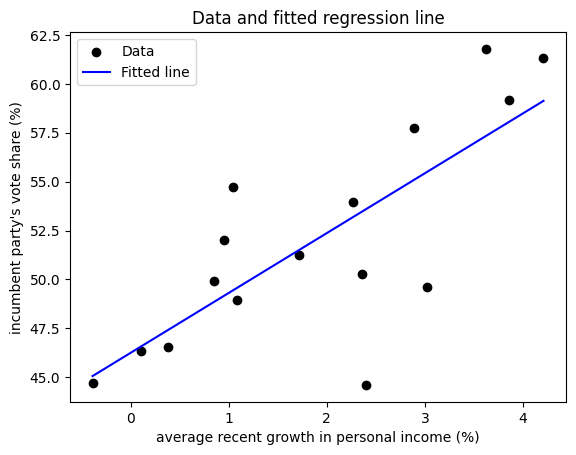

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Define predictor/outcome
predictor = "growth"
outcome = "vote"

# 2. Copy or load your data (here, data = hibbs.copy())
data = hibbs.copy()

# 3. Fit the model (make sure you add a constant if you’re using statsmodels)
X = sm.add_constant(data[predictor])
y = data[outcome]
results_ = sm.OLS(y, X).fit()

# 4. Create x_domain and a new DataFrame for predictions
x_domain = np.linspace(data[predictor].min(), data[predictor].max(), 100)
X_new = pd.DataFrame({predictor: x_domain})
X_new = sm.add_constant(X_new)

# 5. Get fitted values for the domain
fitted_values = results_.predict(X_new)

# 6. Plot the original data and the regression line
plt.scatter(data[predictor], data[outcome], color="k", label="Data")
plt.plot(x_domain, fitted_values, label="Fitted line", color="b")

plt.legend()
plt.ylabel("incumbent party's vote share (%)")
plt.xlabel("average recent growth in personal income (%)")
plt.title("Data and fitted regression line")
plt.show()


We can use the annotated year to mark the data

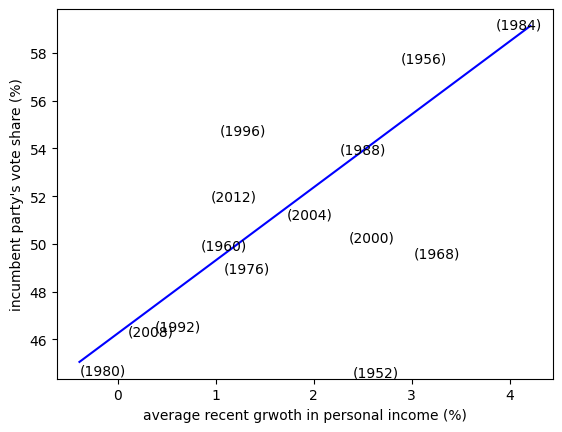

In [9]:
x_coords = hibbs["growth"]
y_coords = hibbs["vote"]
xy_name = hibbs["year"]

for x, y, z in zip(x_coords, y_coords, xy_name):
    plt.annotate(
        '(%s)' % (z),
        xy=(x, y),
        xytext=(0, 0),
        textcoords='offset points',
        va='center')

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

plt.ylabel("incumbent party's vote share (%)")
plt.xlabel("average recent grwoth in personal income (%)")

# Show the plot
plt.show()

### Coefficient Interpretation

In [10]:
results_economy_election

,coef,std err
Intercept,46.247648,1.621931
growth,3.060528,0.696274


- the average vote share that incumbent party has 0 growth of economy is `46.25%`
  - It is make sense that voters will hold the incumbent party responsible for the poor economy performance
  - As a result, it is common for the incumbent party to face a challenging election when the economy is not performing well.

- The average difference in vote share between two incumbent party candidate with one percent different in economic growth, is `3%`, with the incumbent party that has higher growth have the higher vote share

## Prediction
Let’s try to predict 2016 presidential election of Democrat Hillary Clinton vs. Republican Donald Trump. using the model

At the time, the economic growth of the previous four years—was about 2% of incumbent party which choose Hillary Clinton as the election candidate

In [16]:
import statsmodels.api as sm

# X is the predictor, y is the outcome
X = sm.add_constant(data["growth"])  # adds the intercept column
y = data["vote"]
results_ = sm.OLS(y, X).fit()


In [17]:
a_hat = results_.params["const"]   # Intercept
b_hat = results_.params["growth"]  # Slope coefficient


In [18]:
economic_clinton = 2
clinton_vote_share = a_hat + b_hat * economic_clinton
print(f"The linear model predicts Clinton’s forecast vote percentage: "
      f"{np.round(clinton_vote_share, 1)}")


The linear model predicts Clinton’s forecast vote percentage: 52.4


- How likely it is that Clinton would win the popular vote in 2016?

- We can make inferences on prediction result using residual standard deviation
- Linear regression assume the error normal distribution and has standard deviation that estimated from residual standard deviation
- Those standard deviation can tell us the variation of the error in prediction we will get

In [19]:
sigma = np.sqrt(results.mse_resid) # np.std(results.resid, ddof=2)
print(f"estimated residual standard deviation : {np.round(sigma,1)}")

estimated residual standard deviation : 3.8


- The normal distribution in our prediction is drawn by calculating the pdf of normal distribution that tells the value when x in ceratin value
- The normal distribution will show probability distribution that centered on 52.3 with a standard deviation of 3.8.

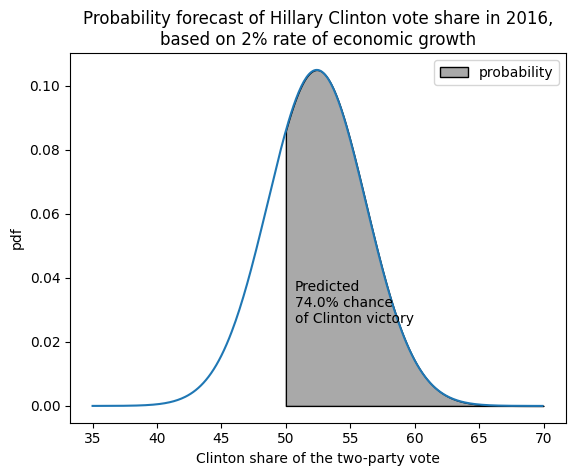

In [20]:
# Normal distribution will centered in our prediction result to tell that model assumed the mean of error is zero
mu = np.round(clinton_vote_share,1)

# Normal distribution has standard deviation that equal to residual standard deviation from model
sigma = np.round(sigma,1)

# Create range in vote share
min_x = 35
min_y = 70

# Threshold vote share to indicate whether the candidate will win or not
threshold = 50

# x in range 35 to 75
x = np.arange(min_x, min_y, 0.1)

# pdf value of normal distribution
y = stats.norm.pdf(x, mu, sigma)

# Plot normal distribution
plt.plot(x, y)


# Draw the area that define the probability  of clinton exceed 50% vote share

x_prob = np.arange(threshold, min_y, 0.01)
y_prob = stats.norm.pdf(x_prob, mu, sigma)

plt.fill_between(x=x_prob, y1=y_prob, color='darkgray', edgecolor='black', label = "probability")

# Calculate the probability of clinton exceed 50% vote share

probability = 1 - stats.norm.cdf(threshold, mu, sigma)

plt.text(50.7, 0.025, f"Predicted\n{np.round(probability,2)*100}% chance\nof Clinton victory", ha='left', va='bottom')

plt.legend()
plt.title('Probability forecast of Hillary Clinton vote share in 2016,\nbased on 2% rate of economic growth')
plt.xlabel('Clinton share of the two-party vote')
plt.ylabel('pdf')
plt.show()

- The pdf will form a bell-shape like that represent the normal distribution
- The whole area under normal distribution is equal to 1 representing the total probability
- We can get the probability of clinton will have more than 50% vote share if we calculate the grey area that is 0.73 or 73%.
- According to this model, there was a 73% chance that Clinton would win in 2016 with economic growth of 2%.
## **Case 3 - Medical Charge**
---

- We have personal insurance data that record medical charge in each person
- We want to know
  - The mean of medical charges in the data
  - The Relationship between smoker and medical charges (`charges`) on this data held using simple linear regression of `charges` on `smoker` variable

  ### Load Data

In [23]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Mean of medical charges

We can directly calculation the mean with usual calculation

In [24]:
np.mean(insurance['charges'])

13270.422265141257

- Under regression model you can also get this value by asssigning the constant term (no predictor) as predictor.

In [25]:
# Create OLS model object
# Use 1 as the sign we wont include any predicotr
model = smf.ols('charges ~ 1', insurance)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_charges = print_coef_std_err(results)
results_charges

,coef,std err
Intercept,13270.422265,331.067454


- You can did it manually calculating the intercept
- We have no x, and estimated $\hat{b}$
- So the equation will be  $\hat{a} = \bar{y}$

In [26]:
# manually calculating the intercept
a_hat = np.mean(insurance["charges"])
a_hat

13270.422265141257

- Estimation of linear regression with no predictor is the same as estimating the mean value of y
- The standard error obtain by the model also can calculated manually by using standard error of the mean $\text{std.err}=\frac{s}{\sqrt{n}}$

In [27]:
std_err = np.std(insurance["charges"])/np.sqrt(len(insurance["charges"]))
std_err

330.943713906084

### Relationship between smoker and charges
- Check the pattern in the data using visualization
- Form the visualization itself, the smoker tend to have higher charges than the non-smoker


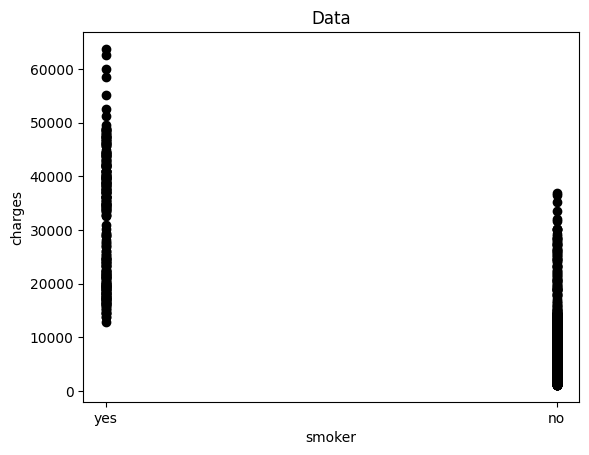

In [28]:
x = insurance['smoker']
y = insurance['charges']

# Plot the data
plt.scatter(x, y, color = "k")

# Add a legend and labels

plt.xlabel("smoker")
plt.ylabel("charges")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

- As we know, in linear regression we have to do numerical calculation to get estimated coeeficient
- So, we need to convert the string "yes" and "no" to binary (1 for "yes", 0 for "no")

In [29]:
# Use LabelEncoder to convert the smoker variable into numeric
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the smoker variable
insurance["smoker"] = LabelEncoder().fit_transform(insurance["smoker"])

# Display the 5th first row after transforming
insurance[["smoker","charges"]].head()

,smoker,charges
0,1,16884.92400
1,0,1725.55230
2,0,4449.46200
3,0,21984.47061
4,0,3866.85520


### Fit Linear Regression



In [30]:
# Create OLS model object
model = smf.ols('charges ~ smoker', insurance)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_smoker_charges = print_coef_std_err(results)

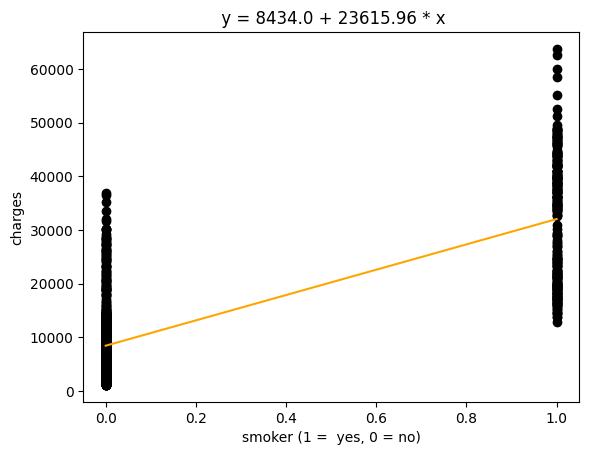

In [31]:
predictor = "smoker"
outcome = "charges"
data = insurance.copy()
results_ = results_smoker_charges.copy()

# scatter-plot data
x = insurance['smoker']
y = insurance['charges']

# Plot the data
plt.scatter(x, y, color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "orange")

plt.ylabel("charges")
plt.xlabel("smoker (1 =  yes, 0 = no)")
plt.title(f" y = {np.round(a_hat)} + {np.round(b_hat, 2)} * x")

plt.show()

### Coefficient Interpretation

In [32]:
results_smoker_charges

,coef,std err
Intercept,8434.268298,229.014172
smoker,23615.963534,506.075290


$$y = 8434.27 + 23615.86 x$$
- The average of the medical charges from the non-smokers is `$8,434.27`
- the difference between average of medical charges the smokers and non-smokers isis `$23,615.86`, with the people that has higher education have the higher earning
These number we can get intuitively by calculating the average medical charges and the different of charges from two subgroup without using linear regression

In [33]:
# mean of medical charges of non-smokers
mean_nonsmoker_charges = np.mean(insurance[insurance["smoker"]==0]["charges"])
mean_nonsmoker_charges

8434.268297856204

- The value of `mean_nonsmoker_charges` is equal to estimated intercept

In [34]:
# mean of medical charges of smokers
mean_smoker_charges = np.mean(insurance[insurance["smoker"]==1]["charges"])

In [35]:
# difference of medical chaeges from smokers and non-smokers
diff =  mean_smoker_charges - mean_nonsmoker_charges
diff

23615.963533676637

- The value of `diff` is equal to estimated slope
- If we plot the mean of charges of smokers and non smokers we get the same number with the coefficient of the model by looking the intercept, and the difference between those two value

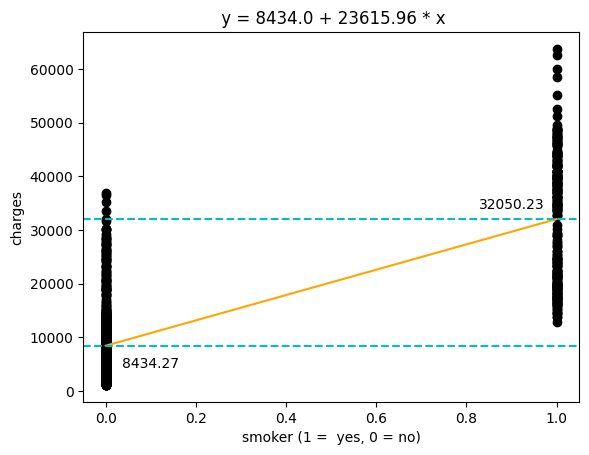

In [36]:
predictor = "smoker"
outcome = "charges"
data = insurance.copy()
results_ = results_smoker_charges.copy()

# scatter-plot data
x = insurance['smoker']
y = insurance['charges']

# Plot the data
plt.scatter(x, y, color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "orange")

plt.ylabel("charges")
plt.xlabel("smoker (1 =  yes, 0 = no)")
plt.title(f" y = {np.round(a_hat)} + {np.round(b_hat, 2)} * x")

plt.axhline(mean_nonsmoker_charges, linestyle="--",color = "c")
plt.axhline(mean_smoker_charges, linestyle="--",color = "c")

plt.text(0.1,(mean_nonsmoker_charges-2000),
         f"{np.round(mean_nonsmoker_charges, 2)}",
         verticalalignment="top",
         horizontalalignment="center")

plt.text(0.9,(mean_smoker_charges+4000),
         f"{np.round(mean_smoker_charges, 2)}",
         verticalalignment="top",
         horizontalalignment="center")

plt.show()